# Terrain Tiles

A global dataset providing bare-earth terrain heights, tiled for easy usage and provided on S3.

Source: https://registry.opendata.aws/terrain-tiles/

- Description
    - Gridded elevation tiles
- Resource type
    - S3 Bucket
- Amazon Resource Name (ARN)
    - `arn:aws:s3:::elevation-tiles-prod`
- AWS Region
    - `us-east-1`

In [75]:
import warnings
warnings.filterwarnings('ignore')

## TerrainTiles

Select multiple terrain tiles based on arbitrary podpac Coordinates

In [41]:
from podpac.datalib.terraintiles import TerrainTiles
from podpac import Coordinates, clinspace
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
# create terrain tiles node
node = TerrainTiles(tile_format='geotiff', zoom=5)

# create coordinates to get tiles
c = Coordinates([clinspace(43, 37, 1000), clinspace(-76, -70, 1000)], dims=['lat', 'lon'])

# evaluate node
output = node.eval(c)

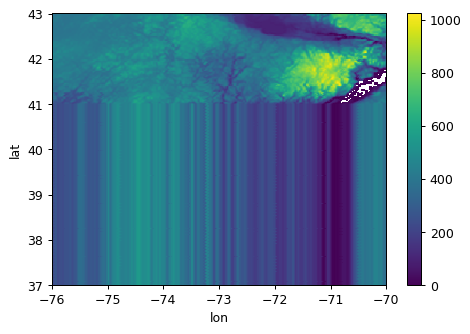

In [99]:
# plot the elevation
fig = plt.figure(dpi=90)
output.plot()
pass

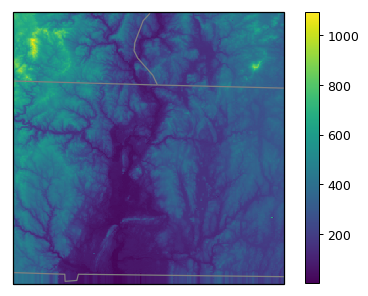

In [86]:
# plot with stream data
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# create the figure
fig = plt.figure(dpi=90)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# set bounds using output
lat_bounds = [output['lat'].min(), output['lat'].max()]
lon_bounds = [output['lon'].min(), output['lon'].max()]
ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())

# Cartopy Feature interface
# See https://scitools.org.uk/cartopy/docs/latest/gallery/feature_creation.html
# rivers = cfeature.NaturalEarthFeature(
#     category='physical',
#     name='rivers_lake_centerlines',
#     scale='50m')

# ax.add_feature(rivers, edgecolor='red', linewidth=2)
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax.add_feature(states_provinces, edgecolor='gray')

output.plot()
pass

In [73]:
n = node.sources[1]
a = n.eval(node._requested_coordinates)
b = node.create_output_array(node._requested_coordinates)

In [74]:
a

<xarray.UnitsDataArray (lat: 1000, lon: 1000)>
array([[202., 202., 202., ..., 255., 255., 255.],
       [185., 185., 185., ..., 221., 221., 221.],
       [185., 185., 185., ..., 223., 223., 223.],
       ...,
       [333., 333., 333., ..., 124., 124., 124.],
       [333., 333., 333., ..., 124., 124., 124.],
       [333., 333., 333., ..., 124., 124., 124.]])
Coordinates:
  * lat      (lat) float64 43.0 43.0 42.99 42.99 42.99 42.98 42.98 42.98 ...
  * lon      (lon) float64 -73.0 -73.0 -72.99 -72.99 -72.99 -72.98 -72.98 ...
Attributes:
    layer_style:  <podpac.core.style.Style object at 0x1c21b20828>
    units:        None

In [71]:
b

<xarray.UnitsDataArray (lat: 1000, lon: 1000)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 43.0 43.0 42.99 42.99 42.99 42.98 42.98 42.98 ...
  * lon      (lon) float64 -73.0 -73.0 -72.99 -72.99 -72.99 -72.98 -72.98 ...
Attributes:
    layer_style:  <podpac.core.style.Style object at 0x1c2170d358>
    units:        None

## TerrainTilesSource

Load one individual tile from the TerrainTiles set

In [76]:
from podpac.datalib.terraintiles import TerrainTilesSource
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
# select a single source from S3 bucket url  
# see `terraintiles.get_tile_urls(...)` below for getting tile endpoints
node = TerrainTilesSource(source='geotiff/6/19/23.tif')

# evaluate at its native coordinates
output = node.eval(node.native_coordinates)

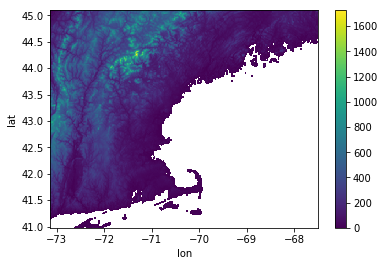

In [78]:
# plot the gridded output data
output.plot()

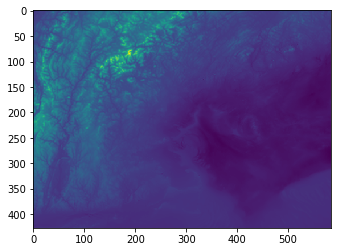

In [39]:
# plot the original raster image using the
# `node` reference to the rasterio dataset
plt.imshow(node.dataset.read(1))
pass

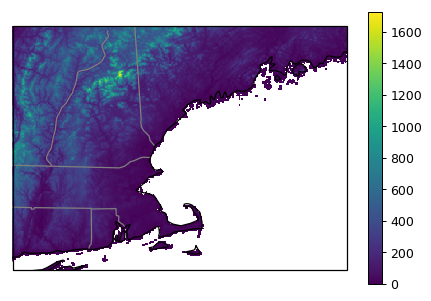

In [79]:
# plot with state lines using Cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# create the figure
fig = plt.figure(dpi=90)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# set bounds using node's native coordinates
lat_bounds = [output['lat'].min(), output['lat'].max()]
lon_bounds = [output['lon'].min(), output['lon'].max()]
ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())

# Cartopy Feature interface
# See https://scitools.org.uk/cartopy/docs/latest/gallery/feature_creation.html
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
ax.coastlines(resolution='50m', linewidth=1)

output.plot()
pass

## Utilies

In [16]:
from podpac.datalib import terraintiles
from podpac.coordinates import Coordinates, clinspace

In [11]:
# available tile formats
terraintiles.TILE_FORMATS

['terrarium', 'normal', 'geotiff']

In [12]:
# get zoom levels tile format
terraintiles.get_zoom_levels(tile_format='geotiff')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [15]:
# get all tile urls for tile format ('geotiff') certain zoom level (1)
terraintiles.get_tile_urls('geotiff', 1)

['geotiff/1/0/-3.tif',
 'geotiff/1/1/-3.tif',
 'geotiff/1/2/-3.tif',
 'geotiff/1/0/-2.tif',
 'geotiff/1/1/-2.tif',
 'geotiff/1/2/-2.tif',
 'geotiff/1/0/-1.tif',
 'geotiff/1/1/-1.tif',
 'geotiff/1/2/-1.tif',
 'geotiff/1/0/0.tif',
 'geotiff/1/1/0.tif',
 'geotiff/1/2/0.tif',
 'geotiff/1/0/1.tif',
 'geotiff/1/1/1.tif',
 'geotiff/1/2/1.tif',
 'geotiff/1/0/2.tif',
 'geotiff/1/1/2.tif',
 'geotiff/1/2/2.tif',
 'geotiff/1/0/3.tif',
 'geotiff/1/1/3.tif',
 'geotiff/1/2/3.tif',
 'geotiff/1/0/4.tif',
 'geotiff/1/1/4.tif',
 'geotiff/1/2/4.tif',
 'geotiff/1/0/5.tif',
 'geotiff/1/1/5.tif',
 'geotiff/1/2/5.tif']

In [25]:
# create coordinates for region
c = Coordinates([clinspace(43, 40, 1000), clinspace(-73, -72, 1000)], dims=['lat', 'lon'])

# get all tile urls for tile format ('geotiff') certain zoom level (9) within coordinates
terraintiles.get_tile_urls('geotiff', 9, coordinates=c)

['geotiff/9/152/188.tif',
 'geotiff/9/153/188.tif',
 'geotiff/9/152/189.tif',
 'geotiff/9/153/189.tif',
 'geotiff/9/152/190.tif',
 'geotiff/9/153/190.tif']